# 1. Set Up the Jupyter Notebook Environment
This section shows how to set up and configure the Jupyter notebook environment in Visual Studio Code.

In [9]:
# Import required libraries
import pandas as pd
import numpy as np

# Load Titanic dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Preview the train dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Display Output in the Output Pane
The output from code cells, such as data previews and plots, will be displayed directly below each cell in the notebook interface.

In [11]:
# Example unit test for data loading

def test_train_data_shape():
    assert train_df.shape[1] == 12, "Train dataset should have 12 columns"
    assert len(train_df) > 0, "Train dataset should not be empty"

test_train_data_shape()

In [13]:
# Suppress XGBoost log notes and warnings
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['XGB_VERBOSE'] = '0'

# 5. Use the Integrated Terminal for Commands
You can use the integrated terminal in Visual Studio Code to run shell commands, manage your environment, and install packages. For example:

- `pip install -r requirements.txt` to install dependencies
- `ls` or `dir` to list files in your workspace
- `python Kaggale_Dataset.py` to run scripts

In [17]:
# Build a predictive model for Titanic survival
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



<AxesSubplot:title={'center':'XGBoost Feature Importance'}>

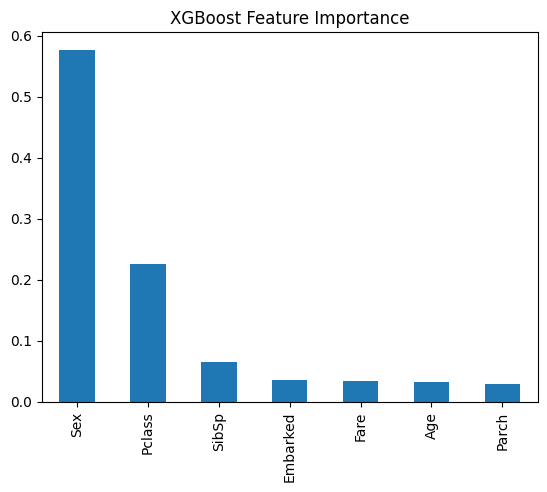

In [20]:
# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = train_df.copy()

# Encode categorical variables
# Fill missing values
for col in ['Age', 'Fare']:
    df[col].fillna(df[col].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = df[features]
y = df['Survived']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model with XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_val)
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy:', accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Feature importance
importances = pd.Series(xgb_model.feature_importances_, index=features)
importances.sort_values(ascending=False).plot(kind='bar', title='XGBoost Feature Importance')

In [ ]:
# Save XGBoost model using its built-in method
xgb_model.save_model('titanic_xgb_model.json')
print('XGBoost model saved to titanic_xgb_model.json')

# Load XGBoost model using its built-in method
from xgboost import XGBClassifier
loaded_xgb_model = XGBClassifier()
loaded_xgb_model.load_model('titanic_xgb_model.json')
print('XGBoost model loaded from titanic_xgb_model.json')

XGBoost model saved to titanic_xgb_model.json
XGBoost model loaded from titanic_xgb_model.json


In [22]:
print(y_pred)
print(X_val.head())

[0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1]
     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
709       3    0  28.0      1      1  15.2458         1
439       2    0  31.0      0      0  10.5000         0
840       3    0  20.0      0      0   7.9250         0
720       2    1   6.0      0      1  33.0000         0
39        3    1  14.0      1      0  11.2417         1


In [ ]:
inference_preds = rf_model.predict(X_test)
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': inference_preds})
submission.head()
submission.to_csv('submission.csv', index=False)

In [ ]:
# Inference on test_df using trained XGBoost model
# Prepare test data (same preprocessing as train)
test_data = test_df.copy()
for col in ['Age', 'Fare']:
    test_data[col].fillna(df[col].median(), inplace=True)
test_data['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X_test = test_data[features]

# Run inference
inference_preds = xgb_model.predict(X_test)

# Show first 10 predictions
print('First 10 predictions:', inference_preds[:10])

# Optionally, create a submission DataFrame
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': inference_preds})
submission.head()
submission.to_csv('submission.csv', index=False)

First 10 predictions: [0 0 0 1 1 0 1 0 1 0]


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


RandomForest Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



<AxesSubplot:title={'center':'RandomForest Feature Importance'}>

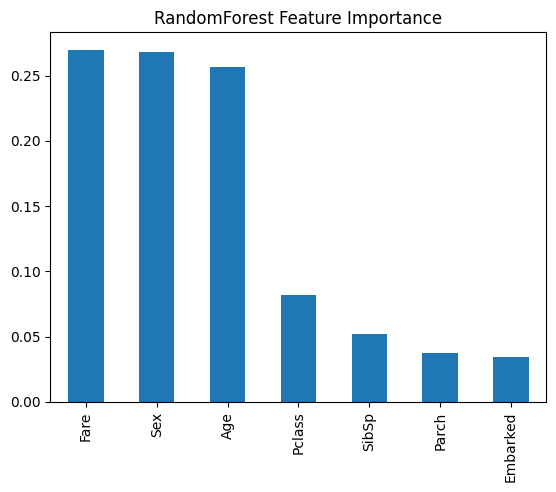

In [24]:
# Train and evaluate RandomForestClassifier for comparison
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_val)

print('RandomForest Accuracy:', accuracy_score(y_val, rf_pred))
print(classification_report(y_val, rf_pred))

# Feature importance
rf_importances = pd.Series(rf_model.feature_importances_, index=features)
rf_importances.sort_values(ascending=False).plot(kind='bar', title='RandomForest Feature Importance')